# 1. Import necessary packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from scipy.stats import skew, norm
%matplotlib inline
from numpy.random import seed


# 2. Load Data

In [3]:
# Uploading data files 


bcpred = pd.read_csv('Breast_cancer_data.csv')
bcpred.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# 3. Data Definition 

In [4]:
bcpred.shape

(569, 6)

In [5]:
# Check column names
bcpred.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [6]:
# Data types
bcpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
# Summary Stats
bcpred.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# 4. Duplication & Missing Values Check

In [8]:
# Checking for null values
bcpred.isnull().values.any()

False

In [9]:
# Checking for not null values
bcpred.notnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
564,True,True,True,True,True,True
565,True,True,True,True,True,True
566,True,True,True,True,True,True
567,True,True,True,True,True,True


In [10]:
# Duplicates check
idsUnique = len(set(bcpred))
idsTotal = bcpred.shape[0]
idsDupli = idsTotal - idsUnique

print('There are ' + str(idsDupli) + ' duplicate IDS for ' + ' total entries')


There are 563 duplicate IDS for  total entries


In [11]:
#Deleting duplicates
bcpred.drop_duplicates()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [12]:
# Checking for missing values
bcpred.isnull()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
564,False,False,False,False,False,False
565,False,False,False,False,False,False
566,False,False,False,False,False,False
567,False,False,False,False,False,False


# 5. EDA - MeanRadius vs. MeanArea

In [13]:
bcpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [14]:
bcpred.mean_radius.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean_radius, dtype: float64

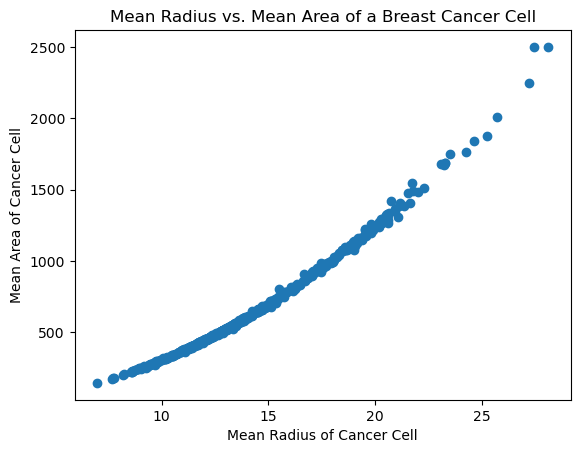

In [15]:
#Comparing the Mean Radius vs. Mean Area to see if there is a correlation in determining whether one has breast cancer or not

plt.scatter(bcpred['mean_radius'], bcpred['mean_area'])
plt.xlabel('Mean Radius of Cancer Cell')
plt.ylabel('Mean Area of Cancer Cell')
plt.title('Mean Radius vs. Mean Area of a Breast Cancer Cell')
plt.show()

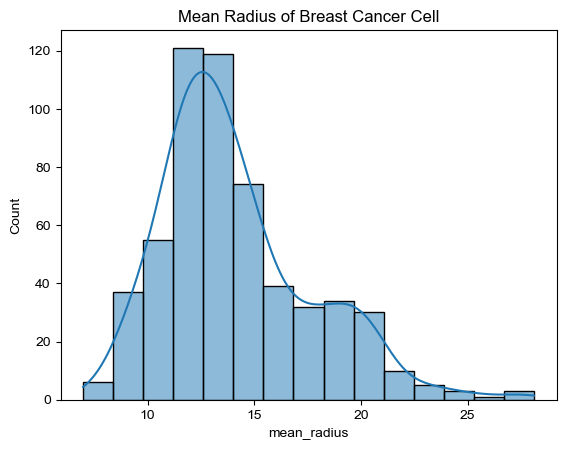

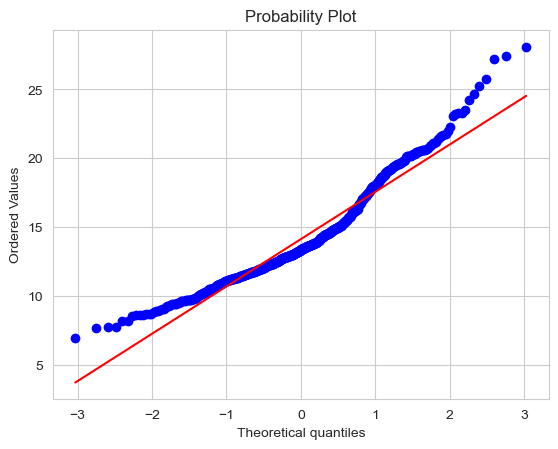

In [16]:
#Making a histogram plot of mean_radius

fig, ax = plt.subplots()
sns.histplot(bcpred['mean_radius'], kde=True, bins=15)
sns.set_style('whitegrid')
ax.set(title='Mean Radius of Breast Cancer Cell')
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(bcpred['mean_radius'], plot=plt)
plt.show()

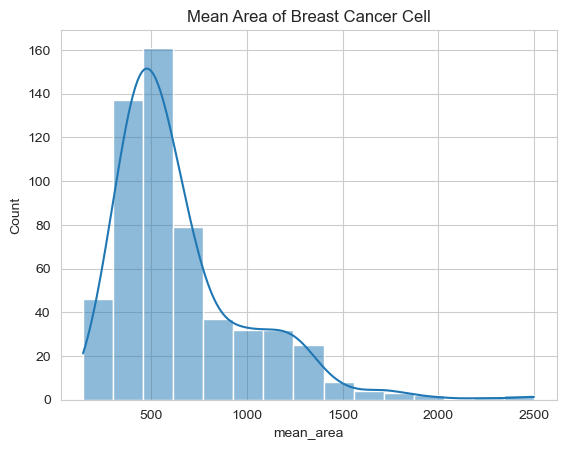

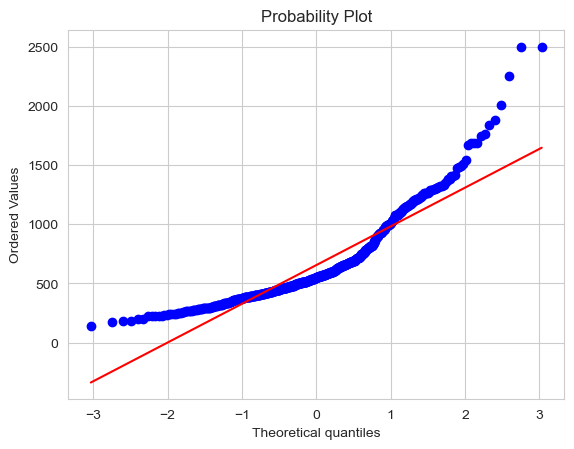

In [17]:
#Making a histogram plot of mean_area

fig, ax = plt.subplots()
sns.histplot(bcpred['mean_area'], kde=True, bins=15)
sns.set_style('whitegrid')
ax.set(title='Mean Area of Breast Cancer Cell')
plt.show()

# QQ-plot
fig = plt.figure()
res = stats.probplot(bcpred['mean_area'], plot=plt)
plt.show()

# 5. Important Numeric Predictions

5.1 Correlations with MeanRadius and MeanArea

In [18]:
num_features = [col for col in bcpred.select_dtypes(exclude = ['object']).columns]

print("There are ", len(num_features), " numeric variables")

There are  6  numeric variables


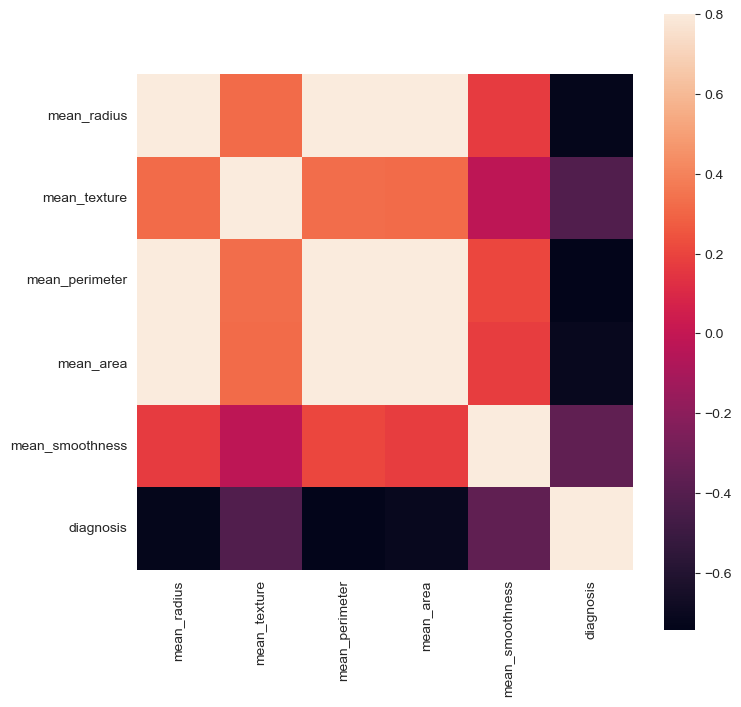

In [20]:
# gaining a view of relationships among the features
corrmat = bcpred.corr()
f, ax = plt.subplots(figsize= (8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Looking at the above heatmap, one can see taht there is a strong correlation between mean_radius, and mean_area, and mean_perimeter, which indicates multicollinearity. 

Even with these strong correlations, the others have to be taking into account such as: mean_smoothness and diagnosis. 

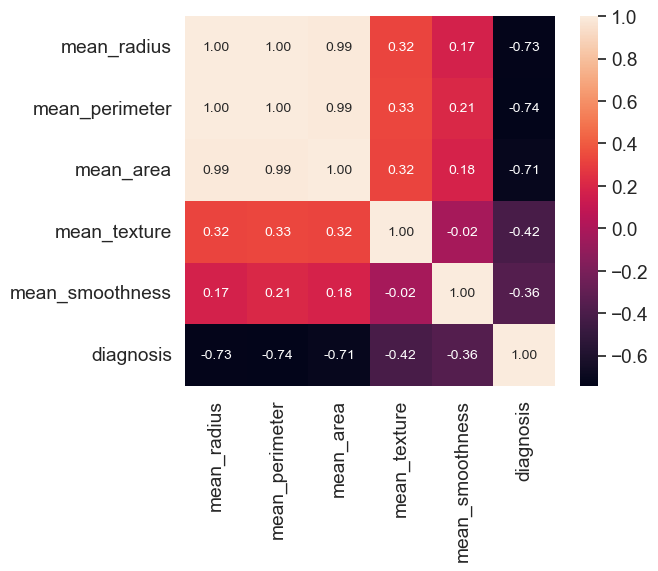

In [21]:
#correlation matrix for mean_radius
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'mean_radius')['mean_radius'].index
cm = np.corrcoef(bcpred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

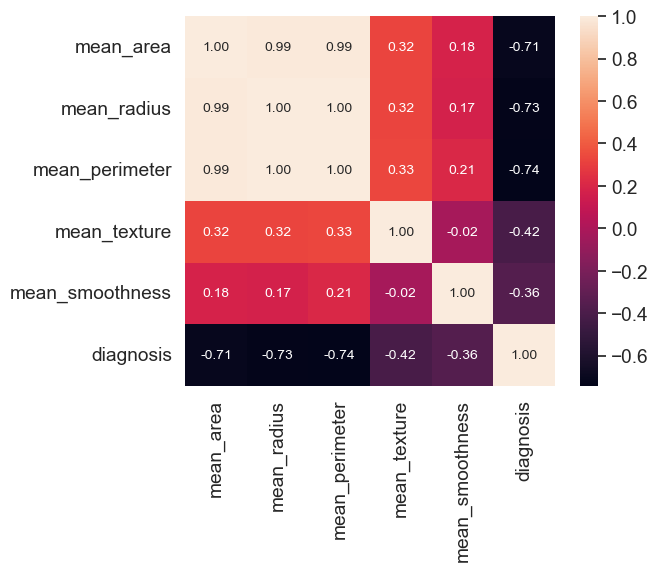

In [22]:
#correlation matrix for mean_area
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'mean_area')['mean_area'].index
cm = np.corrcoef(bcpred[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

~Looking at both heatmaps for mean_radius and mean_area, there are 6 numerical values of at leat -0.7, which indicates a positive correlation. 


# 5.2 Overall Quality

<AxesSubplot:xlabel='mean_radius', ylabel='mean_area'>

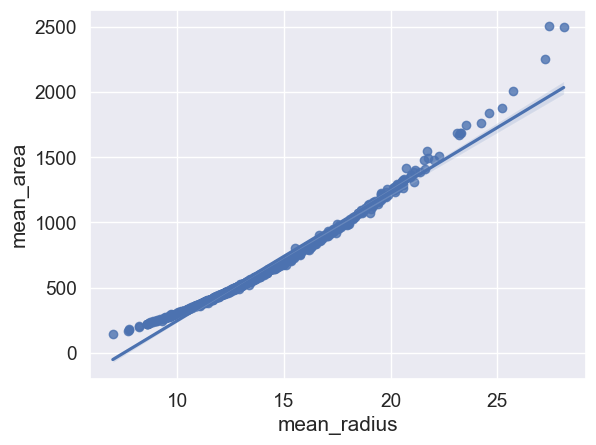

In [23]:
sns.regplot(x=bcpred['mean_radius'], y=bcpred['mean_area'], data=bcpred)


There are no outliers, that stand out, that idicated something different. The 3 outliers on the top-right are of relation to the other data points. 

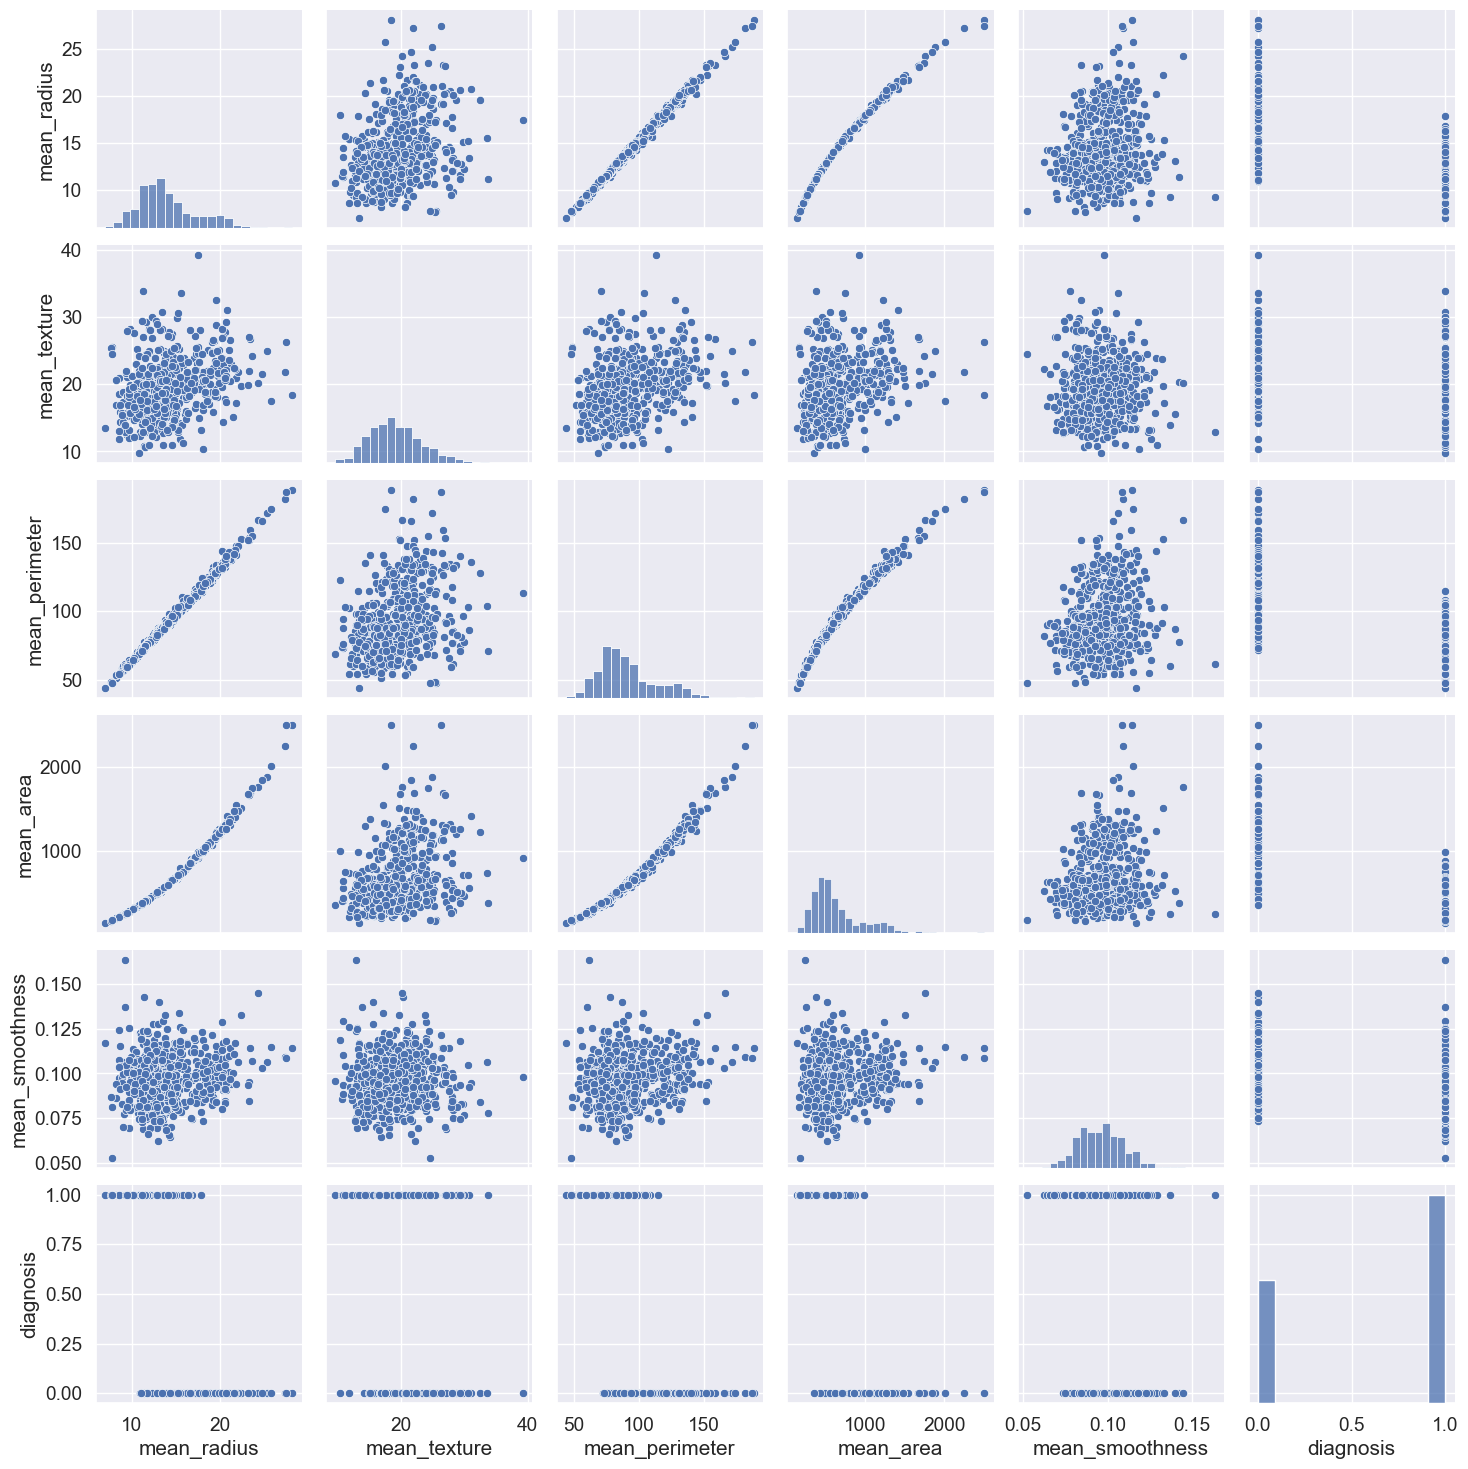

In [24]:
#Pair plot for all numerical variables
sns.pairplot(bcpred, palette='Set1')
plt.show()

# Import pacakges

In [25]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
import datetime
import scipy.stats as stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from scipy.stats import skew
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#njobs = 4



In [27]:
import sklearn.linear_model as sk
logreg=sk.LogisticRegressionCV()

In [28]:
sns.set()

# Importance of Categorical/numerical features vs target variable

In [29]:
# Separate the feature and target variable
target = bcpred['mean_radius'], bcpred['mean_area']

anova_results = {}

for feature in bcpred.select_dtypes(include=['object']):
    # Perform ANOVA test for the current feature
    f_statistic, p_value = f_oneway(*(target[df_cleaned[feature] == category] for category in df_cleaned[feature].unique()))
    # Store the ANOVA results for the current feature in the dictionary
    anova_results[feature] = {'f_statistic': f_statistic, 'p_value': p_value}

# Sort the ANOVA results by the F-statistic in descending order
sorted_results = sorted(anova_results.items(), key=lambda x: x[1]['f_statistic'], reverse=True)

# Print the sorted ANOVA results
for feature, results in sorted_results:
    print('{}: F-statistic: {:.2f}, p-value: {:.2f}'.format(feature, results['f_statistic'], results['p_value']))

In [30]:
# Select the numeric features and the target variable
num_features = bcpred.select_dtypes(exclude=['object']).columns
target_var = 'mean_area' 

# Calculate the Pearson correlation coefficient between each numeric feature and the target variable
corr_results = {}
for feature in num_features:
    corr_coef = bcpred[feature].corr(bcpred[target_var])
    corr_results[feature] = corr_coef

# Create a DataFrame to store the results
result_df = pd.DataFrame.from_dict(corr_results, orient='index', columns=['Correlation Coefficient'])

# Sort the DataFrame by correlation coefficient in descending order
result_df = result_df.sort_values(by='Correlation Coefficient', ascending=False)

# Print the resulting DataFrame
print(result_df)

                 Correlation Coefficient
mean_area                          1.000
mean_radius                        0.987
mean_perimeter                     0.987
mean_texture                       0.321
mean_smoothness                    0.177
diagnosis                         -0.709


In [33]:
train = bcpred

In [34]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["mean_radius"], ascending = False, inplace = True)
print(corr.mean_radius)

Find most important features relative to target
mean_radius        1.000
mean_perimeter     0.998
mean_area          0.987
mean_texture       0.324
mean_smoothness    0.171
diagnosis         -0.730
Name: mean_radius, dtype: float64


# differentiating numerical and categorical features

In [35]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("mean_radius")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 5
Categorical features : 0


In [37]:
train_num.head()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,2.432,4.819,6.910,0.118,0.000
1,2.932,4.897,7.191,0.085,0.000
2,3.102,4.875,7.093,0.110,0.000
3,3.062,4.364,5.959,0.142,0.000
4,2.730,4.913,7.169,0.100,0.000


# Transforming numerical features (no available categorial features)

In [38]:
# Create dummy features for categorical values via one-hot encoding
train_num = pd.get_dummies(train_num)

train_num.head()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,2.432,4.819,6.910,0.118,0.000
1,2.932,4.897,7.191,0.085,0.000
2,3.102,4.875,7.093,0.110,0.000
3,3.062,4.364,5.959,0.142,0.000
4,2.730,4.913,7.169,0.100,0.000


# Data split into testing and training sets

In [39]:
# Join categorical and numerical features
X = pd.concat([train_num, train_cat], axis = 1)
y= train.mean_radius
print("New number of features : " + str(bcpred.shape[1]))

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 6
X_train : (398, 5)
X_test : (171, 5)
y_train : (398,)
y_test : (171,)


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   mean_radius      569 non-null    int64
 1   mean_texture     569 non-null    int64
 2   mean_perimeter   569 non-null    int64
 3   mean_area        569 non-null    int64
 4   mean_smoothness  569 non-null    int64
 5   diagnosis        569 non-null    int64
dtypes: int64(6)
memory usage: 26.8 KB


In [69]:
train.shape

(569, 6)

In [70]:
train.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000,569.000,569.000,569.000,569.000,569.000
mean,13.638,18.786,91.485,654.504,0.000,0.627
std,3.565,4.323,24.323,352.049,0.000,0.484
min,6.000,9.000,43.000,143.000,0.000,0.000
25%,11.000,16.000,75.000,420.000,0.000,0.000
50%,13.000,18.000,86.000,551.000,0.000,1.000
75%,15.000,21.000,104.000,782.000,0.000,1.000
max,28.000,39.000,188.000,2501.000,0.000,1.000


In [71]:
train.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000,0.327,0.995,0.984,NaN,-0.729
mean_texture,0.327,1.000,0.329,0.321,NaN,-0.414
mean_perimeter,0.995,0.329,1.000,0.986,NaN,-0.743
mean_area,0.984,0.321,0.986,1.000,NaN,-0.709
mean_smoothness,NaN,NaN,NaN,NaN,NaN,NaN
diagnosis,-0.729,-0.414,-0.743,-0.709,NaN,1.000


In [72]:
train1= train.dropna()

In [73]:
train1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17,10,122,1001,0,0
1,20,17,132,1326,0,0
2,19,21,130,1203,0,0
3,11,20,77,386,0,0
4,20,14,135,1297,0,0
...,...,...,...,...,...,...
564,21,22,142,1479,0,0
565,20,28,131,1261,0,0
566,16,28,108,858,0,0
567,20,29,140,1265,0,0


In [75]:
train['mean_smoothness'].replace(['YES', 'NO'], [1,0], inplace=True)

In [76]:
train['diagnosis'].replace(['YES', 'NO'], [1,0], inplace=True)

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [84]:
X = train.iloc[:, 1:5]
y = train.iloc[:, -1]

In [88]:
best_features = SelectKBest(score_func=chi2, k =2)
fit = best_features.fit(X, y)

In [89]:
best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(X,y)

In [90]:
df_diag = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

In [95]:
mean_diag = pd.concat([df_diag, df_columns], axis=1)
mean_diag.columns = ['mean_area', 'diagnosis']
mean_diag.sort_values(by = 'mean_area')

,mean_area,diagnosis
0,96.661,mean_texture
1,2025.936,mean_perimeter
2,54059.254,mean_area
3,NaN,mean_smoothness


# Comparing different models 

In [40]:
#import machine learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MultiLabelBinarizer

# Random Forest 

In [41]:
# Define regressor
random_forest = RandomForestRegressor()

In [42]:
# Fit model
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
# Score of model
random_forest.score(X_test, y_test)

0.9979663660830385

In [44]:
# Predictions
predictions= random_forest.predict(X_test)

# Errors
errors= abs(predictions - y_test)

In [45]:
print('Metrics for Random Forest Trained on Training Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')


Metrics for Random Forest Trained on Training Data
Average absolute error: 0.09 degrees.


In [46]:
#examine features

RF_features = random_forest.feature_importances_

# names of columns
RF_names = X_test.columns

# Indices of RF
RF_indices = np.argsort(RF_features)[::-1]

# Coefficients of features randked by importance
RF_names[RF_indices][:10]
RF_features[RF_indices][:10]

array([7.90968635e-01, 2.07950446e-01, 6.03275611e-04, 4.68189385e-04,
       9.45429442e-06])

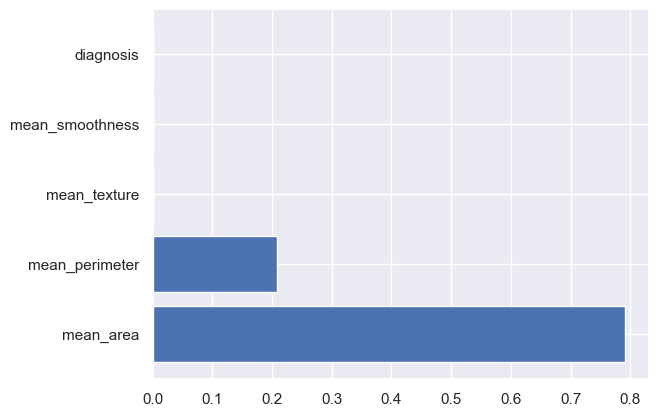

In [47]:
#look at graph of features by importance

plt.barh(RF_names[RF_indices][:15],RF_features[RF_indices][:15]);

# Logistic Regression

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [49]:
display(train.dtypes)

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [50]:
#converting multiple columns to integer from float
train = train.astype({'mean_radius':'int', 'mean_texture': 'int', 'mean_perimeter': 'int', 'mean_area': 'int', 'mean_smoothness':'int'})

#display datatype to see if conversion worked
display(train.dtypes)

mean_radius        int64
mean_texture       int64
mean_perimeter     int64
mean_area          int64
mean_smoothness    int64
diagnosis          int64
dtype: object

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   mean_radius      569 non-null    int64
 1   mean_texture     569 non-null    int64
 2   mean_perimeter   569 non-null    int64
 3   mean_area        569 non-null    int64
 4   mean_smoothness  569 non-null    int64
 5   diagnosis        569 non-null    int64
dtypes: int64(6)
memory usage: 26.8 KB


In [52]:
# Convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)



In [56]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 398 entries, 149 to 102
Series name: mean_radius
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [62]:
y_train = y_train.astype({'mean_radius':'int'})

In [63]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 398 entries, 149 to 102
Series name: mean_radius
Non-Null Count  Dtype
--------------  -----
398 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


In [96]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/ABBY/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_pred = logreg.predict(X_test)
print(X_test)
print(y_pred)

     mean_texture  mean_perimeter  mean_area  mean_smoothness  diagnosis
204         2.976           4.408      6.180            0.100      0.693
70          3.105           4.825      7.031            0.090      0.000
131         3.019           4.632      6.620            0.109      0.000
431         2.927           4.412      6.150            0.105      0.693
540         2.737           4.326      6.001            0.100      0.693
..            ...             ...        ...              ...        ...
69          2.862           4.411      6.222            0.098      0.693
542         3.274           4.561      6.507            0.083      0.693
176         2.948           4.184      5.715            0.097      0.693
501         3.238           4.536      6.392            0.116      0.000
247         2.715           4.454      6.241            0.088      0.693

[171 rows x 5 columns]
[12 19 13 12 12 13 19 19 12 12 12 19 12 13 12 13 12 11 11 19 13 12 19 11
 11 12 12 11 12 13 11 12 11

In [111]:
#split again into training and test set due to changed columns and then fit

logreg = LogisticRegression()
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .5, random_state = 2)
result=logreg.fit(X_train, y_train)


In [113]:
#Accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
# Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 94  16]
 [ 17 158]]


In [117]:
#Evaluation of model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.91      0.90      0.91       175

    accuracy                           0.88       285
   macro avg       0.88      0.88      0.88       285
weighted avg       0.88      0.88      0.88       285



In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import math

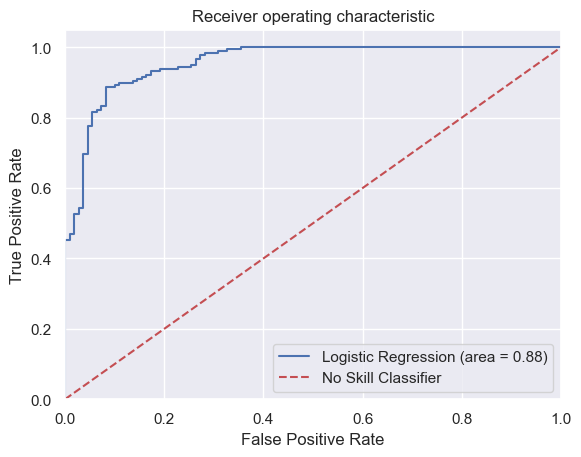

In [120]:
#AUC-ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='No Skill Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#Graph labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [121]:
#Precision Recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(precision, recall)


[0.61403509 0.90804598 1.        ] [1.         0.90285714 0.        ]


In [122]:
# F1 score

f1 = f1_score(y_test, y_pred)
print(f1)

0.9054441260744985


In [123]:
# Precision-recall AUC

auc = auc(recall, precision)
print(auc)

0.9352761213378274


In [124]:
# Precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.905 auc=0.935


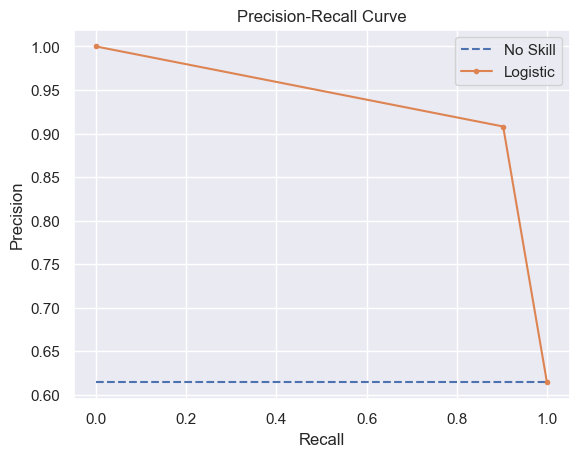

In [129]:
# Predict class values
yhat = logreg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

# Summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# Plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')

#Graph labels
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [130]:
#Coeffcieints of features

coefficients=(logreg.coef_[0])
print(coefficients)

[-0.28745353 -0.54914962  0.02632025  0.        ]
